In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('job_data_cleaned.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'state', 'age', 'python',
       'r_studio', 'spark', 'aws', 'tableau', 'excel', 'ml'],
      dtype='object')

In [4]:
def job_title_cleaning(title):
    """
    input: Job titles as a string
    output: A string containing one of the five basic categories or na if none apply 
    """
    if 'data scientist' in title.lower():
        return 'data_scientist'
    elif 'data engineer' in title.lower():
        return "data_engineer"
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

In [5]:
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'junior' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
    

In [6]:
# Simplify job description into 5 categories
df['job_simplified'] = df['Job Title'].apply(job_title_cleaning)

# Extract seniority information from jobt title
df['seniority'] = df['Job Title'].apply(seniority)

In [7]:
# Check number of jobs in each category
df.job_simplified.value_counts()

data_scientist    503
na                171
data_engineer      57
analyst            37
mle                19
manager             9
director            4
Name: job_simplified, dtype: int64

In [8]:
# Check seniority distribution
df.seniority.value_counts()

na        597
senior    200
jr          3
Name: seniority, dtype: int64

In [9]:
# Job description length
df['desc_length'] = df['Job Description'].apply(lambda x: len(x))

In [10]:
# 
df.desc_length.value_counts()

2495    4
3361    3
8173    3
4286    3
3204    3
       ..
1673    1
2696    1
1671    1
3284    1
3073    1
Name: desc_length, Length: 679, dtype: int64

In [11]:
# We didnt find any competitors while scraping
df.Competitors.unique()

array([-1], dtype=int64)

In [12]:
# 
df.describe()

,Unnamed: 0,Rating,Headquarters,Competitors,min_salary,max_salary,avg_salary,age,python,r_studio,spark,aws,tableau,excel,ml,desc_length
count,800.0000,800.000000,800.0,800.0,800.00000,800.000000,800.000000,680.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,399.5000,3.783125,-1.0,-1.0,76.50250,142.573750,109.538125,51.302941,0.082500,0.002500,0.036250,0.052500,0.028750,0.252500,0.253750,3885.537500
std,231.0844,1.151525,0.0,0.0,15.07254,27.060763,20.621009,50.563913,0.275297,0.049969,0.187029,0.223173,0.167208,0.434718,0.435428,1843.944127
min,0.0000,-1.000000,-1.0,-1.0,48.00000,97.000000,73.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000
25%,199.7500,3.700000,-1.0,-1.0,65.00000,127.000000,94.500000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2695.000000
50%,399.5000,4.000000,-1.0,-1.0,74.00000,136.000000,108.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3596.500000
75%,599.2500,4.300000,-1.0,-1.0,90.00000,158.000000,122.000000,73.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4766.500000
max,799.0000,5.000000,-1.0,-1.0,104.00000,196.000000,146.500000,275.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18466.000000


## Plotting some of the numerical columns to study their distributions

<AxesSubplot:>

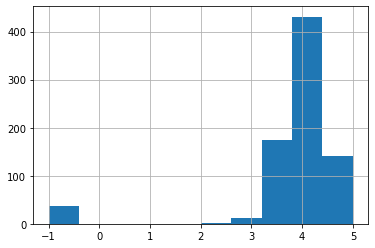

In [13]:
df.Rating.hist()

<AxesSubplot:>

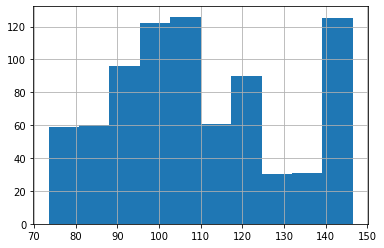

In [14]:
# A not so normal distribution. It is weird that there are so many jobs with salarys around the avg salary
df.avg_salary.hist()

<AxesSubplot:>

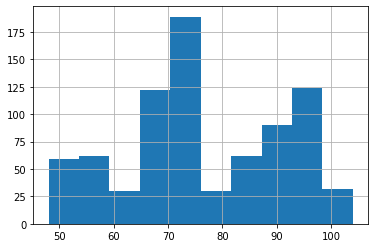

In [15]:
df.min_salary.hist()

<AxesSubplot:>

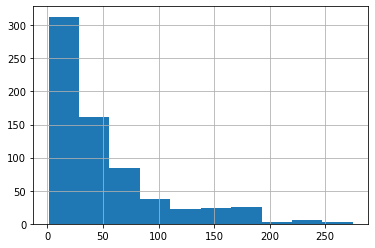

In [16]:
## This has an exponential distribution. So we should normalize this column if we wanna use it in a regression model
df.age.hist()

<AxesSubplot:>

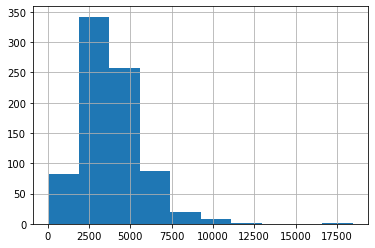

In [17]:
df.desc_length.hist()

<AxesSubplot:>

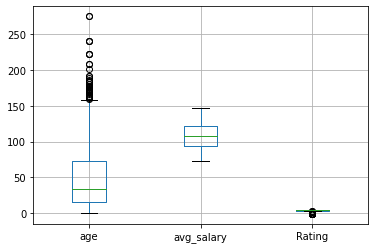

In [18]:
# Some really old companies and not much information from rating because of scale. Surprinsingly no outliers for avg_salary.
df.boxplot(column=['age', 'avg_salary', 'Rating'])

<AxesSubplot:>

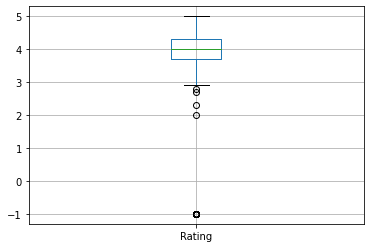

In [19]:
# A few -1's there. They represent those job offers that we couldn't find a rating for. We should drop them before doing any real analysis on that column
df.boxplot(column='Rating')

<AxesSubplot:>

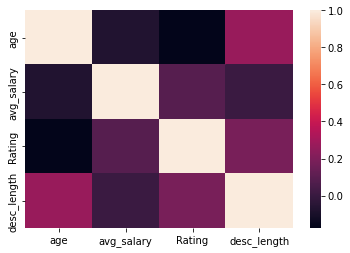

In [20]:
df_num = df[['age', 'avg_salary', 'Rating', 'desc_length']].corr()
sns.heatmap(df_num)

In [21]:
df_num

,age,avg_salary,Rating,desc_length
age,1.000000,-0.070463,-0.174868,0.272087
avg_salary,-0.070463,1.000000,0.089268,0.006750
Rating,-0.174868,0.089268,1.000000,0.186137
desc_length,0.272087,0.006750,0.186137,1.000000


In [22]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'state', 'age', 'python',
       'r_studio', 'spark', 'aws', 'tableau', 'excel', 'ml', 'job_simplified',
       'seniority', 'desc_length'],
      dtype='object')

In [23]:
# Making some barplots to understand the distribution of some of the categorical variables

df_cat = df[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector',
'Revenue', 'state', 'spark', 'aws', 'tableau', 'excel', 'job_simplified', 'seniority', 'Company Name']]

graph for Location: total = 259


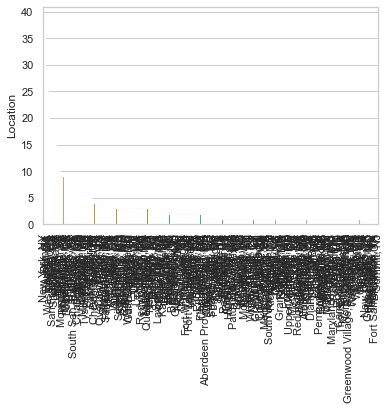

graph for Headquarters: total = 1


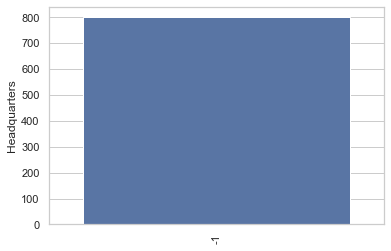

graph for Size: total = 9


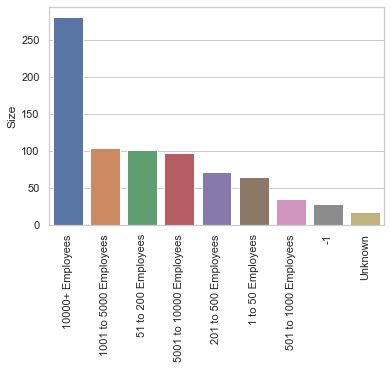

graph for Type of ownership: total = 33


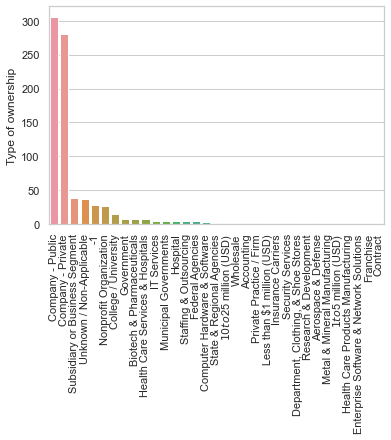

graph for Industry: total = 74


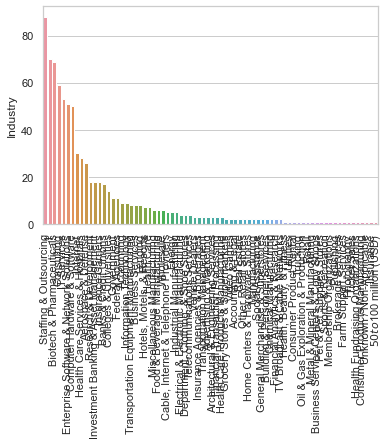

graph for Sector: total = 30


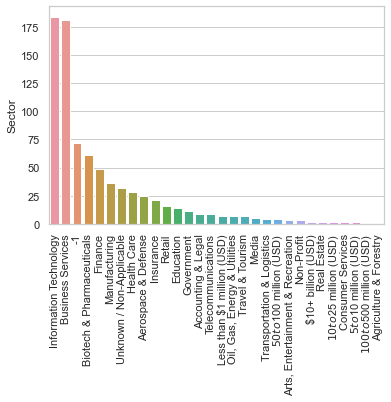

graph for Revenue: total = 14


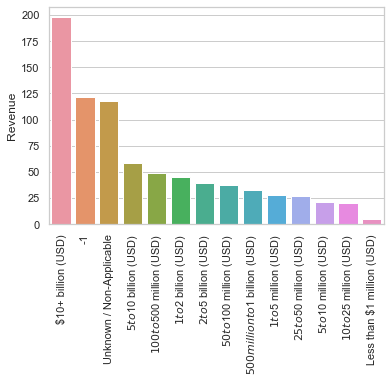

graph for state: total = 46


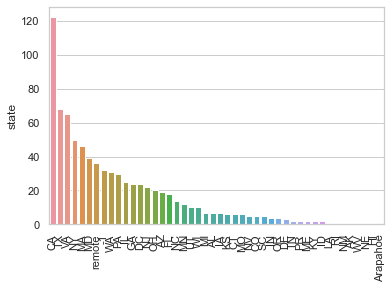

graph for spark: total = 2


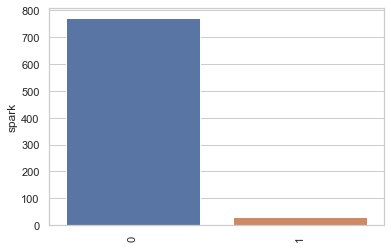

graph for aws: total = 2


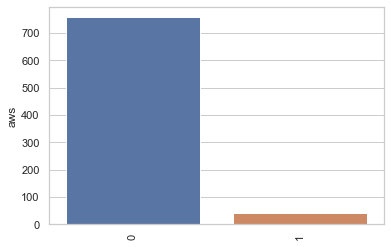

graph for tableau: total = 2


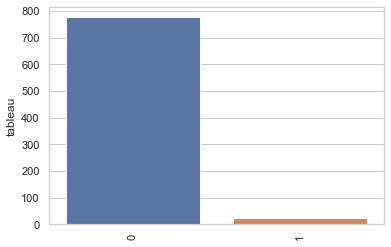

graph for excel: total = 2


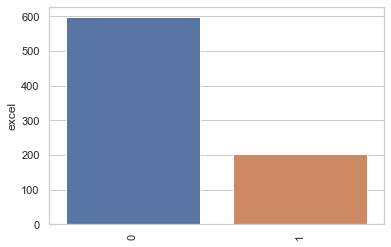

graph for job_simplified: total = 7


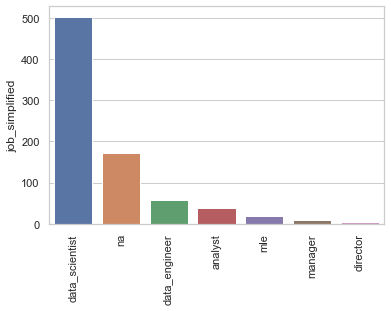

graph for seniority: total = 3


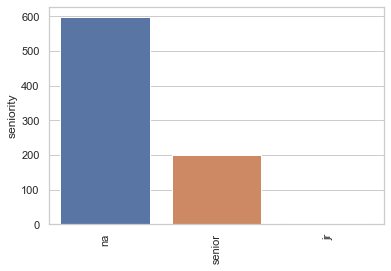

graph for Company Name: total = 491


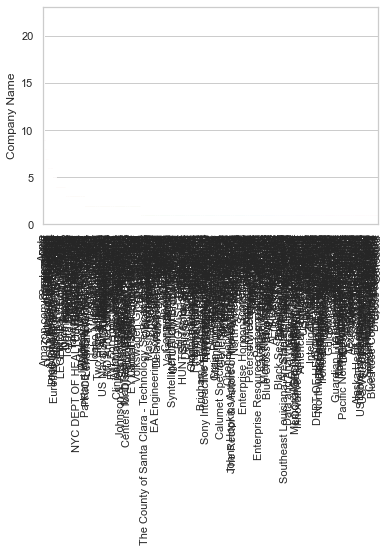

In [24]:
sns.set_theme(style="whitegrid")

for col in df_cat.columns:
    cat_num = df_cat[col].value_counts()
    print("graph for %s: total = %d" % (col, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


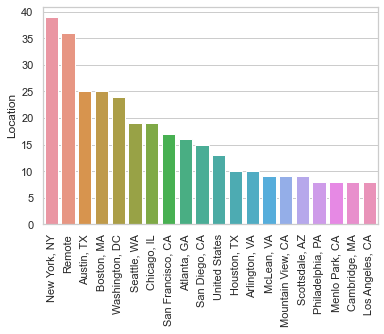

graph for Company Name: total = 20


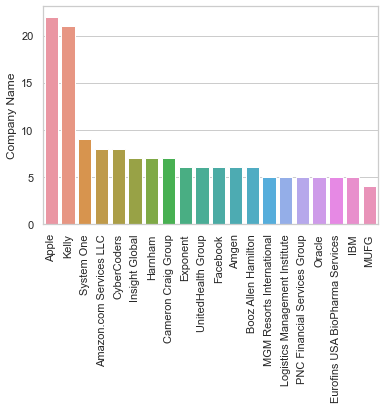

In [25]:
# We will take the top 20 of location and company name because there were too many and it was impossible to distinguish the labels
sns.set_theme(style="whitegrid")
df2 = df[['Location', 'Company Name']]
for col in df2.columns:
    df2_vals = df2[col].value_counts()[:20]
    print("graph for %s: total = %d" % (col, len(df2_vals)))
    chart = sns.barplot(x=df2_vals.index, y=df2_vals)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [26]:
# Directors are the least paid in average???
pd.pivot_table(df, index=['job_simplified', 'seniority'], values='avg_salary')

avg_salary
job_simplified seniority            
analyst        jr          73.500000
               na         104.728571
               senior      98.000000
data_engineer  na         108.509804
               senior     113.083333
data_scientist jr         107.750000
               na         112.684290
               senior     107.623529
director       senior      99.625000
manager        na          90.583333
               senior     133.666667
mle            na         108.605263
na             na         107.338710
               senior     107.937500

In [27]:
# Directors are the least paid in average???
pd.pivot_table(df, index=['state'], values='avg_salary').sort_values(by='avg_salary', ascending=False)

,avg_salary
state,
AK,128.500000
RI,128.500000
Arapahoe,122.000000
NE,121.500000
UT,120.550000
HI,120.500000
MO,119.166667
TN,118.750000
MN,115.333333


In [28]:
pd.pivot_table(df, index=['state', 'job_simplified'], values='avg_salary').sort_values(by='state', ascending=False)

avg_salary
state  job_simplified            
remote na              104.687500
       manager         139.500000
       data_scientist  109.954545
       data_engineer   109.125000
       analyst         104.500000
...                           ...
AK     analyst         128.500000
-1     data_scientist  105.178571
       data_engineer   120.500000
       mle             105.250000
       analyst         100.000000

[133 rows x 1 columns]

In [29]:
pd.set_option('display.max_rows', None)

In [30]:
pd.pivot_table(df, index=['state', 'job_simplified'], values='avg_salary', aggfunc='count').sort_values(by='state', ascending=False)

avg_salary
state    job_simplified            
remote   na                       8
         manager                  1
         data_scientist          22
         data_engineer            4
         analyst                  1
WV       data_scientist           1
WI       data_scientist           3
         data_engineer            1
         na                       6
WA       na                       5
         mle                      2
         manager                  1
         data_scientist          20
         data_engineer            2
         analyst                  1
VA       data_scientist          46
         analyst                  1
         data_engineer            6
         na                       9
         manager                  1
         mle                      2
UT       na                       2
         data_scientist           5
         data_engineer            3
TX       na                       7
         mle                      1
         data_scientist          52
         data_engineer            6
         analyst                  2
TN       data_scientist           2
SC       analyst                  1
         data_scientist           4
RI       na                       1
PR       na                       1
         data_scientist           1
PA       na                      13
         manager                  2
         data_scientist          15
OR       na                       2
         data_engineer            1
         analyst                  1
OH       na                       5
         mle                      1
         data_scientist          14
NY       data_engineer            1
         na                       7
         mle                      1
         data_scientist          41
NV       data_scientist           5
NM       mle                      1
NJ       na                      10
         manager                  1
         director                 1
         data_scientist           8
         analyst                  2
NE       data_scientist           1
NC       na                       2
         data_scientist           9
         data_engineer            3
MO       data_scientist           3
         data_engineer            1
         analyst                  2
MN       mle                      1
         data_engineer            2
         na                       2
         data_scientist           7
MI       na                       2
         data_scientist           4
         data_engineer            1
ME       na                       2
MD       na                       8
         data_scientist          25
         data_engineer            1
         analyst                  5
MA       na                      16
         mle                      1
         data_scientist          24
         data_engineer            4
         analyst                  1
LA       analyst                  1
KY       data_scientist           2
KS       data_scientist           2
         na                       4
IN       na                       2
         data_scientist           2
IL       na                       5
         data_scientist          15
         data_engineer            3
         analyst                  2
ID       na                       2
IA       na                       5
         data_scientist           2
HI       na                       1
GA       mle                      2
         data_scientist          21
         data_engineer            1
FL       data_scientist          12
         data_engineer            4
         analyst                  2
DE       data_engineer            1
         data_scientist           2
DC       mle                      1
         data_scientist          15
         data_engineer            1
         analyst                  2
         na                       5
CT       na                       1
         manager                  1
         director                 1
         data_scientist      

In [31]:
pd.pivot_table(df[df['job_simplified'] == 'data_scientist'], index=['state'], values='avg_salary').sort_values(by='avg_salary', ascending=False)

,avg_salary
state,
KS,127.750000
CT,127.666667
Arapahoe,122.000000
NE,121.500000
UT,120.800000
TN,118.750000
PA,117.566667
MO,117.500000
MA,117.375000


In [32]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'state', 'age', 'python',
       'r_studio', 'spark', 'aws', 'tableau', 'excel', 'ml', 'job_simplified',
       'seniority', 'desc_length'],
      dtype='object')

In [33]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'python', 'r_studio', 'spark', 'aws', 'excel', 'desc_length', 'Type of ownership']]

In [34]:
df_pivots.head()

,Rating,Industry,Sector,Revenue,python,r_studio,spark,aws,excel,desc_length,Type of ownership
0,3.4,Insurance Carriers,Insurance,$10+ billion (USD),0,0,0,0,0,6638,Subsidiary or Business Segment
1,4.7,-1,-1,-1,0,0,0,0,0,2233,Unknown / Non-Applicable
2,3.4,Insurance Carriers,Insurance,$10+ billion (USD),1,0,1,0,0,6650,Subsidiary or Business Segment
3,3.9,Enterprise Software & Network Solutions,Information Technology,$100 to $500 million (USD),0,0,0,0,1,5991,Company - Public
4,3.2,Insurance Carriers,Insurance,$50 to $100 million (USD),0,0,0,0,0,4637,Company - Private


In [35]:
for col in df_pivots.columns:
    print(col)
    print(pd.pivot_table(df, index = col, values='avg_salary').sort_values(by='avg_salary', ascending=False))

Rating
        avg_salary
Rating            
 3.0    122.375000
 3.1    122.200000
 4.7    119.657895
 2.9    118.250000
 4.1    113.292453
 4.0    113.255435
 3.2    113.200000
 4.9    112.200000
 3.6    112.189655
 3.7    111.563636
 3.5    111.250000
 4.6    110.343750
 4.4    110.300000
 4.3    110.233871
 4.5    109.100000
 4.2    108.835714
 5.0    108.683333
 3.4    108.314815
 4.8    108.235294
 2.0    108.000000
 2.7    108.000000
 3.3    107.142857
 3.9    105.275281
 3.8    104.623077
-1.0    101.473684
 2.8     73.500000
 2.3     73.500000
Industry
                                         avg_salary
Industry                                           
Trucking                                 146.500000
Health, Beauty, & Fitness                146.500000
TV Broadcast & Cable Networks            144.750000
Video Games                              144.750000
Membership Organizations                 143.000000
Consumer Products Manufacturing          143.000000
Utilities        

In [49]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

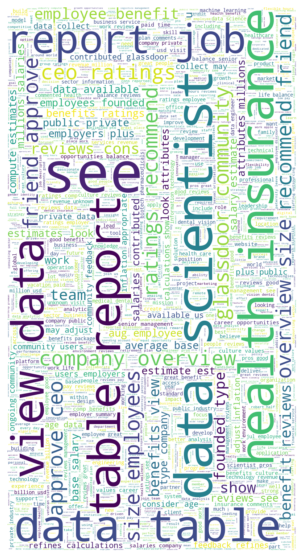

In [59]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wct = wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wct, interpolation="bilinear")
plt.axis('off')
plt.show()

In [58]:
wc.generate(text)